# Analisis archivo de salida bw-...

sss

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import os

In [20]:
switch_df = pd.read_csv('monitoreo2.csv',sep=';', index_col=0)
switch_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 1553295090 to 1553295094
Data columns (total 15 columns):
iface_name         25 non-null object
bytes_out/s        25 non-null float64
bytes_in/s         25 non-null float64
bytes_total/s      25 non-null float64
bytes_in           25 non-null int64
bytes_out          25 non-null int64
packets_out/s      25 non-null float64
packets_in/s       25 non-null float64
packets_total/s    25 non-null float64
packets_in         25 non-null int64
packets_out        25 non-null int64
errors_out/s       25 non-null float64
errors_in/s        25 non-null float64
errors_in          25 non-null int64
errors_out\n       25 non-null int64
dtypes: float64(8), int64(6), object(1)
memory usage: 3.1+ KB


In [30]:
#print(switch_df)
switch_df_as_list = switch_df.index.tolist()
v_ini= switch_df_as_list[0]
switch_df_as_list = list(map(lambda x: x - v_ini, switch_df_as_list))
# print(switch_df_as_list)
switch_df.index = switch_df_as_list 
#print(switch_df)
#print(switch_df['iface_name'])
grouped = switch_df.groupby('iface_name')
#print(grouped.groups)
for name, group in grouped:
    print(name)
    print(group)

lo
  iface_name  bytes_out/s  bytes_in/s  bytes_total/s  bytes_in  bytes_out  \
0         lo          0.0         0.0            0.0         0          0   
2         lo        646.0       646.0         1292.0       646        646   
2         lo       4726.0      4726.0         9452.0      4726       4726   
3         lo        341.0       341.0          682.0       341        341   
4         lo        277.0       277.0          554.0       277        277   

   packets_out/s  packets_in/s  packets_total/s  packets_in  packets_out  \
0            0.0           0.0              0.0           0            0   
2            9.0           9.0             18.0           9            9   
2           49.0          49.0             98.0          49           49   
3            4.0           4.0              8.0           4            4   
4            3.0           3.0              6.0           3            3   

   errors_out/s  errors_in/s  errors_in  errors_out\n  
0           0.0      

In [46]:
info_s1_eth1 = grouped.get_group('s1-eth1')
info_s1_eth2 = grouped.get_group('s1-eth2')
info_s1_eth3 = grouped.get_group('s1-eth3')
info_lo = grouped.get_group('lo')
print(info_lo['packets_out/s'])

0     0.0
2     9.0
2    49.0
3     4.0
4     3.0
Name: packets_out/s, dtype: float64


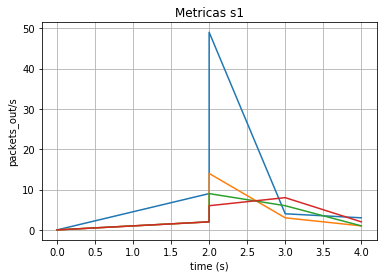

In [49]:
fig, ax = plt.subplots()
ax.plot(info_lo.index, info_lo['packets_out/s'])
ax.plot(info_s1_eth1.index, info_s1_eth1['packets_out/s'])
ax.plot(info_s1_eth2.index, info_s1_eth2['packets_out/s'])
ax.plot(info_s1_eth3.index, info_s1_eth3['packets_out/s'])
ax.set(xlabel='time (s)', ylabel='packets_out/s',
       title='Metricas s1')
ax.grid()